# **Notebook 6.1: Running Inference and Exploring Decoding Techniques with GPT-2 & Gradio 🚀**  

## **Introduction 📚**  

Welcome to **Notebook 6.1**, the **first notebook in our Inference Module**! 🎉  

Having successfully **built and fine-tuned** our custom GPT-2 model, we now shift our focus from training to **inference**—the exciting stage where we bring our model to life and explore its text generation capabilities.  

In this notebook, we’ll **load pretrained weights, test different decoding techniques**, and even **build an interactive Gradio-powered UI** to make text generation seamless and user-friendly.  

![Decoding Strategies Overview](images/decoding.jpg)  

### **What’s Inside? 🔍**  

1️⃣ **Loading Pretrained Weights with Hugging Face 🤗**  
   - Instead of training from scratch, we'll leverage **Hugging Face’s `transformers` library** to load pretrained GPT-2 weights effortlessly.  
   - This allows us to utilize knowledge gained from massive-scale datasets, making our model smarter and more capable right away.  

2️⃣ **Running Inference & Testing Model Output**  
   - We’ll generate text using our GPT-2 model and evaluate its performance with different prompts.  
   - Expect surprises, creativity, and even some quirks as we push the model to produce engaging responses!  

3️⃣ **Exploring Decoding Strategies in Large Language Models 🧠**  
   - Decoding is the magic behind **how** text gets generated. We'll dive into techniques like:  
     - **Greedy Decoding**  
     - **Beam Search**  
     - **Top-k Sampling**  
     - **Top-p (Nucleus) Sampling**  
     - **Temperature Scaling**  
   - Each method impacts **fluency, randomness, and coherence**, and we'll compare their effects on generated text.  

4️⃣ **Implementing a Custom Inference Function from Scratch**  
   - While Hugging Face provides built-in inference methods, we’ll **design our own function** to gain **full control** over:  
     - Sampling strategies  
     - Output length  
     - Temperature  
     - Diversity of responses  

5️⃣ **Building a Gradio-Powered UI for Real-Time Interaction 🎨**  
   - To wrap things up, we'll create an **intuitive interface using Gradio**, making it easy to:  
     - Enter custom prompts  
     - Adjust model settings  
     - View generated text instantly  
   - No coding required—just **type and generate!**  

---

### **Why This Notebook Matters 💡**  

This is the **first step in our Inference Module**, where we transition from fine-tuning to real-world deployment. Understanding how different **decoding techniques** influence output quality is crucial for building more **coherent, creative, and controlled text generation systems**.  

---

### **What You’ll Achieve by the End 🌟**  

By the time you finish this notebook, you’ll have:  
✅ A fully functional **GPT-2 model** running inference with pretrained weights.  
✅ A deep understanding of **decoding techniques** and how they shape text generation.  
✅ The ability to **customize inference** and fine-tune generation parameters.  
✅ A sleek **Gradio UI** that allows anyone to interact with your model effortlessly.  

🚀 **Let’s get started and make AI talk!** 🎉  

In [2]:
import torch 
from UTILS.model import GPTModel

# Configuration for the GPT model
GPT_CONFIG_124 = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False,
}

# Initialize the GPT model with the configuration
model = GPTModel(GPT_CONFIG_124)

# Print the model architecture to verify
print(model)


GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_resid): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=7

# **1 - Loading Pretrained Weights into a Custom GPT Model**  

## **Introduction**  

In this section, we will explore how to **load pretrained weights** into our **custom-built GPT model**. Instead of training from scratch, we can leverage existing pretrained models to **speed up development and improve performance**.  

There are two main approaches to achieve this:  

1️⃣ **Manually Implementing the Loading Mechanism** 🔧  
   - This involves writing custom code to map pretrained weights to our model architecture.  
   - We will reference the source code that handles weight assignment and compatibility checks.  

2️⃣ **Using Hugging Face’s `transformers` Library** 🤗  
   - The Hugging Face library provides a simple API to load and initialize pretrained weights into a model.  
   - This approach is faster and ensures that we use well-tested configurations from the Hugging Face model hub.  

---

## **Overview of the Process**  

### **1. Loading the Pretrained GPT-2 Model 🏋️‍♂️**  


### **2. Defining Model Configurations ⚙️**  

To allow flexibility in model selection, we define configurations for different GPT-2 sizes:  

✅ **Model Mapping for Easy Access**  

Each model size has **different embedding dimensions, layer counts, and attention heads**.  

---

### **3. Loading Weights into the Custom Model 🔄**  

The function **`load_weights`** maps pretrained weights to our custom GPT model:  

#### **Key Steps in Weight Assignment:**  
✅ **Embedding Layers:**  
   - Assigns token and positional embeddings.  

✅ **Transformer Blocks:**  
   - Loops through each transformer block and assigns:  
     - **Attention Weights:** (query, key, value projections)  
     - **Feedforward Layers:** (MLP weights)  
     - **Layer Normalization Parameters**  

✅ **Final Assignments:**  
   - Ensures all weights are correctly transferred before inference.  

Each weight is **checked for shape compatibility** using `assign_check`, ensuring that no mismatches occur.  

---

### **4. Setting the Model to Evaluation Mode 🛑**  
 
### **5. Integrating Pretrained Weights into Our Custom Model 🏗️**  

Now, we initialize our **custom-built GPT model** and load the pretrained weights.

Lets this in action

In [3]:
from transformers import GPT2LMHeadModel, GPT2Model  # Import the classes for GPT-2 models from the Hugging Face library

# Step 1: Load the pretrained GPT-2 Small model from Hugging Face
# This creates an instance of the GPT2LMHeadModel, which includes the language modeling head necessary for text generation.
pretrained_model = GPT2LMHeadModel.from_pretrained("gpt2")

# Step 2: Define a dictionary of allowed model names
# This dictionary maps user-friendly names of various GPT-2 models to their corresponding identifiers in the Hugging Face model hub.
model_names = {
    "gpt2-small (124M)": "openai-community/gpt2",          # 124 million parameters
    "gpt2-medium (355M)": "openai-community/gpt2-medium",  # 355 million parameters
    "gpt2-large (774M)": "openai-community/gpt2-large",    # 774 million parameters
    "gpt2-xl (1558M)": "openai-community/gpt2-xl"          # 1558 million parameters
}

# Here, we specifically load the "gpt2-small" model, specifying a cache directory for storing the model weights.
gpt_hf = GPT2Model.from_pretrained(model_names['gpt2-small (124M)'], cache_dir="checkpoints")

# This disables certain layers like dropout during inference, ensuring consistent outputs during model evaluation or text generation.
gpt_hf.eval()

# Optional: If you have a custom model defined, you might want to load the pretrained weights into it
# Example (assuming `model` is your custom model):
# model.load_state_dict(pretrained_model.state_dict(), strict=False)

# Note: If using your custom model, ensure it has the same architecture as the pretrained model for proper weight loading.


GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2SdpaAttention(
        (c_attn): Conv1D(nf=2304, nx=768)
        (c_proj): Conv1D(nf=768, nx=768)
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D(nf=3072, nx=768)
        (c_proj): Conv1D(nf=768, nx=3072)
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

In [4]:
# Define the base configuration for the model
BASE_CONFIG = {
    "vocab_size": 50257,    # The total number of unique tokens in the vocabulary
    "context_length": 1024, # The maximum number of tokens the model can process in a single input
    "drop_rate": 0.0,       # The dropout rate used during training to prevent overfitting (0.0 means no dropout)
    "qkv_bias": True        # Indicates whether to include a bias term in the query, key, and value projections
}

# Define the model-specific configurations for different sizes of GPT-2
model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},   # Configuration for the small model
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16}, # Configuration for the medium model
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},  # Configuration for the large model
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},     # Configuration for the extra-large model
}

# Update the BASE_CONFIG with the settings for the selected GPT-2 model
# Here, we are selecting the configuration for the 'gpt2-small (124M)' model to update the base settings.
BASE_CONFIG.update(model_configs['gpt2-small (124M)'])

# The updated BASE_CONFIG will now include:
# - 'emb_dim': 768 (embedding dimension)
# - 'n_layers': 12 (number of transformer layers)
# - 'n_heads': 12 (number of attention heads in each layer)


In [5]:
import numpy as np
import torch

# Step 1: Define a function to assign weights and check for shape compatibility
def assign_check(left, right):
    # Check if the shapes of the two tensors are the same
    if left.shape != right.shape:
        raise ValueError(f"Shape mismatch. Left: {left.shape}, Right: {right.shape}")
    # Clone the right tensor, detach it from the computation graph, and convert it to a nn.Parameter
    return torch.nn.Parameter(right.clone().detach())

# Step 2: Define the function to load weights from the Hugging Face model to the custom GPT model
def load_weights(gpt, gpt_hf):
    # Get the state dictionary (weights) from the Hugging Face model
    d = gpt_hf.state_dict()

    # Step 3: Assign the positional embedding weights
    gpt.pos_emb.weight = assign_check(gpt.pos_emb.weight, d["wpe.weight"])
    
    # Step 4: Assign the token embedding weights
    gpt.tok_emb.weight = assign_check(gpt.tok_emb.weight, d["wte.weight"])
    
    # Step 5: Loop through each transformer block to assign weights
    for b in range(BASE_CONFIG["n_layers"]):
        # Split the attention weights into query, key, and value weights
        q_w, k_w, v_w = np.split(d[f"h.{b}.attn.c_attn.weight"], 3, axis=-1)
        
        # Assign the query, key, and value weights for the current transformer block
        gpt.trf_blocks[b].att.W_query.weight = assign_check(gpt.trf_blocks[b].att.W_query.weight, q_w.T)
        gpt.trf_blocks[b].att.W_key.weight = assign_check(gpt.trf_blocks[b].att.W_key.weight, k_w.T)
        gpt.trf_blocks[b].att.W_value.weight = assign_check(gpt.trf_blocks[b].att.W_value.weight, v_w.T)
    
        # Split the attention biases into query, key, and value biases
        q_b, k_b, v_b = np.split(d[f"h.{b}.attn.c_attn.bias"], 3, axis=-1)
        
        # Assign the biases for the query, key, and value
        gpt.trf_blocks[b].att.W_query.bias = assign_check(gpt.trf_blocks[b].att.W_query.bias, q_b)
        gpt.trf_blocks[b].att.W_key.bias = assign_check(gpt.trf_blocks[b].att.W_key.bias, k_b)
        gpt.trf_blocks[b].att.W_value.bias = assign_check(gpt.trf_blocks[b].att.W_value.bias, v_b)
    
        # Assign the output projection weights and biases for the attention layer
        gpt.trf_blocks[b].att.out_proj.weight = assign_check(gpt.trf_blocks[b].att.out_proj.weight, d[f"h.{b}.attn.c_proj.weight"].T)
        gpt.trf_blocks[b].att.out_proj.bias = assign_check(gpt.trf_blocks[b].att.out_proj.bias, d[f"h.{b}.attn.c_proj.bias"])
    
        # Assign weights and biases for the feedforward layers
        gpt.trf_blocks[b].ff.layers[0].weight = assign_check(gpt.trf_blocks[b].ff.layers[0].weight, d[f"h.{b}.mlp.c_fc.weight"].T)
        gpt.trf_blocks[b].ff.layers[0].bias = assign_check(gpt.trf_blocks[b].ff.layers[0].bias, d[f"h.{b}.mlp.c_fc.bias"])
        gpt.trf_blocks[b].ff.layers[2].weight = assign_check(gpt.trf_blocks[b].ff.layers[2].weight, d[f"h.{b}.mlp.c_proj.weight"].T)
        gpt.trf_blocks[b].ff.layers[2].bias = assign_check(gpt.trf_blocks[b].ff.layers[2].bias, d[f"h.{b}.mlp.c_proj.bias"])
    
        # Assign weights and biases for the layer normalization layers
        gpt.trf_blocks[b].norm1.scale = assign_check(gpt.trf_blocks[b].norm1.scale, d[f"h.{b}.ln_1.weight"])
        gpt.trf_blocks[b].norm1.shift = assign_check(gpt.trf_blocks[b].norm1.shift, d[f"h.{b}.ln_1.bias"])
        gpt.trf_blocks[b].norm2.scale = assign_check(gpt.trf_blocks[b].norm2.scale, d[f"h.{b}.ln_2.weight"])
        gpt.trf_blocks[b].norm2.shift = assign_check(gpt.trf_blocks[b].norm2.shift, d[f"h.{b}.ln_2.bias"])
    
    # Step 6: Assign weights and biases for the final normalization layer and output head
    gpt.final_norm.scale = assign_check(gpt.final_norm.scale, d[f"ln_f.weight"])
    gpt.final_norm.shift = assign_check(gpt.final_norm.shift, d[f"ln_f.bias"])
    gpt.out_head.weight = assign_check(gpt.out_head.weight, d["wte.weight"])


In [6]:
gpt = GPTModel(BASE_CONFIG)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
load_weights(gpt, gpt_hf)

If you prefer to not use the hugging face method i provide you with this manual method:

In [7]:
## Choose the model to use
# CHOOSE_MODEL = "gpt2-small (124M)"

## Base configuration settings for the model
# BASE_CONFIG = {
#     "vocab_size": 50257,     # Size of the vocabulary used by the model
#     "context_length": 1024,  # Maximum context length the model can handle
#     "drop_rate": 0.0,        # Dropout rate for regularization
#     "qkv_bias": True         # Whether to use bias terms in query, key, and value projections
# }

## Dictionary containing configurations for different GPT-2 model sizes
# model_configs = {
#     "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},      # Config for small model
#     "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},    # Config for medium model
#     "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},     # Config for large model
#     "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},       # Config for extra-large model
# }

## Update the BASE_CONFIG with parameters specific to the chosen model
# BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

## Assert to check that the maximum length of the training dataset does not exceed the model's context length
# assert train_dataset.max_length <= BASE_CONFIG["context_length"], (
#     f"Dataset length {train_dataset.max_length} exceeds model's context "
#     f"length {BASE_CONFIG['context_length']}. Reinitialize data sets with "
#     f"`max_length={BASE_CONFIG['context_length']}`"
# )

# from UTILS.load_weights import download_and_load_gpt2 , load_weights_into_gpt
# from UTILS.model import GPTModel

# model_size = CHOOSE_MODEL.split(" ")[-1].lstrip("(").rstrip(")")
# settings, params = download_and_load_gpt2(model_size=model_size, models_dir="gpt2")

# model = GPTModel(BASE_CONFIG)
# load_weights_into_gpt(model, params)
# model.eval()

# Uncomment the above code to run the process of loading pretrained GPT-2 weights into a custom model.
# Refer to the source code for `download_and_load_gpt2` and `load_weights_into_gpt` in the `UTILS` directory for more details.


lets run inference on an identical model from hugging face to act as a basline 

In [8]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model.eval()

text = "I have a dream"
input_ids = tokenizer.encode(text, return_tensors='pt').to(device)

outputs = model.generate(input_ids, max_length=len(input_ids.squeeze())+5)
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Generated text: {generated_text}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated text: I have a dream of being a doctor.


When you run the model multiple times, you’ll often get the same output—like *"I have a dream of being a doctor"*—each time. This may seem like the model is outputting the entire phrase in one go, but that’s not the case. In reality, large language models (LLMs) generate text **token by token**, choosing the most likely next token based on the preceding tokens.

### How Text Generation Works:
1. **Logits to Probabilities**:
   The model first calculates **logits**—scores for every possible token in its vocabulary—and then converts these into probabilities. For example, the token "of" might have a **17% probability** of following "I have a dream."

2. **Autoregressive Models**:
   LLMs like GPT are autoregressive, meaning they predict each token based on the previous ones. The joint probability of a sequence of tokens is calculated step by step:

   \[
   P(w) = P(w_1) P(w_2 | w_1) P(w_3 | w_2, w_1) ... P(w_t | w_1, ..., w_{t-1})
   \]

   This means the model computes probabilities for each token based on the history of previously generated tokens.

### The Role of Decoding Strategies:
The output is determined by the decoding strategy used. The most common approach is **greedy search**, where the model always picks the most likely next token. This leads to deterministic outputs, so you'll get the same result each time.

But there are other decoding strategies we can explore to introduce variety:

- **Beam Search**: Looks ahead at multiple possible sequences.
- **Top-k Sampling**: Chooses the next token from the top *k* most probable ones.
- **Nucleus Sampling**: Selects tokens from a subset of the most probable options, based on a cumulative probability threshold.

Here’s an illustrative breakdown of how the process works:

<p align="center">
    <img src="images/generate.png" alt="Text Generation Process" />
</p>

This figure shows the tokenization, prediction, and calculation of probabilities, helping to clarify how each token is generated and how different strategies influence the final output.

By switching from greedy search to methods like top-k or nucleus sampling, the model can generate more diverse and creative outputs instead of repeating the same sequence every time.

**Designing a Custom Inference Function**  
## **1- Greedy Search**  

In this section, we will implement a function that converts the tensor outputs of a GPT model into text. But before diving into the implementation, let's take a step back and understand how a Large Language Model (LLM) generates text one token at a time.  

### **How Does a GPT Model Generate Text?**  

A GPT model follows an **autoregressive** approach, predicting one token at a time based on previously generated tokens. The decoding process consists of multiple steps, which we illustrate in the figure below.  

<div align="center">

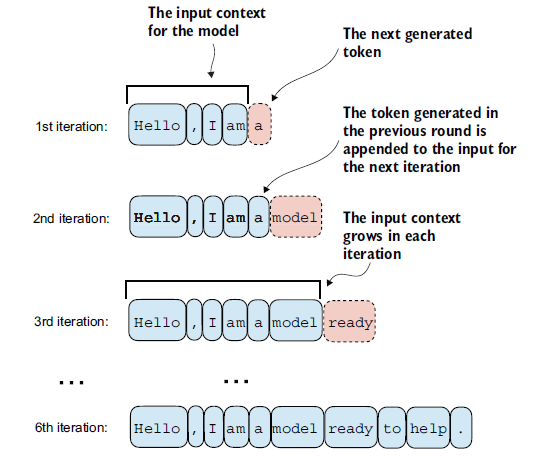

</div>  

### **A Simple Text Generation Pipeline**  

A basic text generation pipeline consists of the following steps:  

1. **Tokenizing the Input**: The input text is first converted into a sequence of tokens. Tokenization maps words or subwords to numerical representations that the model can process.  
2. **Feeding Data to the Model**: The tokenized input is passed into the GPT model, which outputs a probability distribution over the entire vocabulary. These probabilities determine the likelihood of each possible next token.  
3. **Extracting Logits for Generation**: The model produces logits of shape `(batch_size, sequence_length, vocab_size)`, from which we extract the logits for the last token in the sequence.  
4. **Selecting the Next Token**: Depending on the decoding strategy, we select the next token. One simple method is **greedy search**, which always picks the most probable token at each step.  

this is called "

### 1- **Greedy Search: The Simplest Decoding Strategy**  

Greedy search follows a straightforward approach:  

- At each timestep, it **selects the token with the highest probability** and appends it to the sequence.  
- The process continues until the desired number of tokens is generated or an end-of-sequence token is reached.  
- While efficient, **greedy search can be short-sighted**, often missing globally optimal sequences due to its lack of exploration.  


In [9]:
import tiktoken

# Initialize TikToken encoder (GPT-2 compatible)
enc = tiktoken.get_encoding("gpt2")

def greedy_generate(prompt, target_length=6):
    """Generates exactly `target_length` tokens using TikToken encoding."""
    
    # Encode input prompt using TikToken
    input_ids = torch.tensor(enc.encode(prompt), dtype=torch.long).unsqueeze(0)

    for _ in range(target_length):  # Generate a fixed number of tokens
        outputs = model(input_ids)
        logits = outputs.logits[:, -1, :]
        next_token_id = torch.argmax(logits, dim=-1)

        # Append next token and continue
        input_ids = torch.cat([input_ids, next_token_id.unsqueeze(0)], dim=-1)

    # Decode using TikToken
    generated_text = enc.decode(input_ids.squeeze().tolist())
    return generated_text

# Generate text with fixed length
prompt = "I have a dream"
output_text = greedy_generate(prompt, target_length=5)
print(output_text)


I have a dream of being a doctor.


Next lets try to visulize the generation prcoess, usign graphs and networkx library:

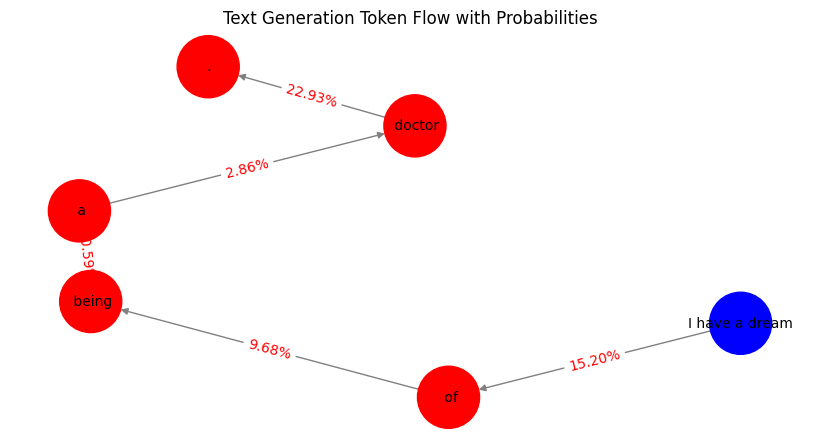

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import torch.nn.functional as F

def visualize_token_generation(prompt, target_length=6):
    """Generates text while visualizing token sequence and probabilities in a graph."""
    
    # Encode input prompt
    input_ids = torch.tensor(enc.encode(prompt), dtype=torch.long).unsqueeze(0)

    # Initialize a directed graph
    G = nx.DiGraph()

    # Add first node (input prompt)
    prev_token_text = prompt
    G.add_node(prev_token_text, color='blue')

    for _ in range(target_length):
        outputs = model(input_ids)
        logits = outputs.logits[:, -1, :]
        
        # Convert logits to probabilities
        probs = F.softmax(logits, dim=-1)

        # Get the most likely token and its probability
        next_token_id = torch.argmax(probs, dim=-1)
        prob_value = probs[0][next_token_id].item()  # Keep as a float (not a string)

        # Append next token and continue
        input_ids = torch.cat([input_ids, next_token_id.unsqueeze(0)], dim=-1)

        # Decode new token
        new_token_text = enc.decode([next_token_id.item()])

        # Add node and edge with numerical probability weight
        G.add_node(new_token_text, color='red')
        G.add_edge(prev_token_text, new_token_text, weight=prob_value)  # Store as float

        # Update previous token
        prev_token_text = new_token_text

    # Draw the graph
    plt.figure(figsize=(8, 4))
    colors = [G.nodes[n]['color'] for n in G.nodes]
    pos = nx.spring_layout(G, seed=42)  # Use seed for consistent layout

    # Draw graph with node colors
    nx.draw(G, pos, with_labels=True, node_color=colors, edge_color="gray", font_size=10, node_size=2000)

    # Convert edge weights to percentage labels
    edge_labels = {(u, v): f"{d['weight'] * 100:.2f}%" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="red")

    plt.title("Text Generation Token Flow with Probabilities")
    plt.show()

# Run visualization
prompt = "I have a dream"
visualize_token_generation(prompt, target_length=5)


Now lets generate again fo longer sequence:

In [11]:
# Generate text with fixed length
prompt = "I have a dream"
output_text = greedy_generate(prompt, target_length=15)
print(output_text)

I have a dream of being a doctor. I have a dream of being a doctor. I


## Decoding strategies to control randomness

### Decoding Strategies to Control Randomness

Upon analyzing the generated text, we notice several shortcomings that affect the overall quality and diversity of the output:

1. **Repetition of Phrases**:
   - The model tends to repeat phrases, especially as the sequence length increases. This repetitiveness can make the generated text feel mechanical and unengaging. 

2. **Stagnant Output**:
   - Even when we regenerate text with the same prompt, we often observe the same or very similar outputs. This indicates a lack of variability in the generation process, which should ideally leverage the model's learned probabilities to produce diverse sequences.

3. **Sequence Breakdown**:
   - As the sequence becomes longer, it appears that the model struggles to maintain coherence and context, leading to fragmented or nonsensical phrases. This is often a result of the model relying too heavily on earlier tokens without effectively incorporating the entire context.

### What Went Wrong?

The issues outlined can be attributed to the following factors:

1. **Decoding Methodology**:
   - The method of choosing the next token significantly impacts the generated text. Using **greedy sampling** (selecting the token with the highest probability) can lead to deterministic and repetitive outputs. Instead, we should consider probabilistic approaches like **temperature sampling** and **top-k sampling**.

2. **Lack of Diversity**:
   - If the output does not vary with different generations, it suggests that the sampling method may not be exploring the probability distribution effectively. This can be exacerbated by settings that don't allow enough randomness, such as high temperature values or low top-k values.


### Enhancing the Model's Output

To address these issues and improve the text generation, we can employ a combination of advanced decoding strategies:

1. **Adjusting Temperature**:
   - Implement temperature scaling to control randomness. A lower temperature (e.g., 0.7) makes the output more focused, while a higher temperature (e.g., 1.2) introduces more variability. This allows the model to sample from less likely tokens, reducing repetition and increasing diversity.

2. **Utilizing Top-k Sampling**:
   - Top-k sampling helps focus on the most probable tokens while excluding less likely ones. By adjusting the value of k, we can control how many options the model considers, promoting more varied outputs.


## Understanding Temperature and Top-k Sampling
Temperature:

The temperature parameter controls the randomness of predictions by scaling the logits before applying the softmax function. A higher temperature (e.g., >1) results in more randomness (more diverse outputs), while a lower temperature (e.g., <1) makes the model more confident and conservative in its predictions.

<div align="center">

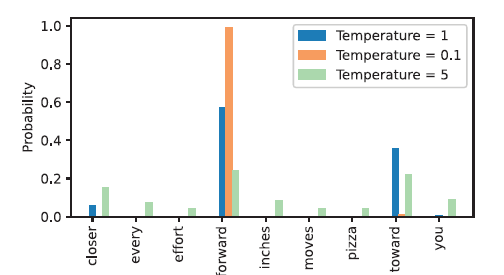

</div>





In [12]:
# lets explore the comcept of temperature in code form : 

# Function to apply temperature scaling to the model's output logits
def apply_temperature(logits, temperature):
    """
    Applies temperature scaling to the logits.

    Parameters:
    - logits (torch.Tensor): The raw output from the model before applying softmax.
    - temperature (float): A scaling factor that controls the randomness of the output.

    Returns:
    - torch.Tensor: The probabilities obtained by applying softmax after temperature scaling.
    """

    # Check if the temperature is 1.0 (no scaling)
    if temperature == 1.0:
        # When temperature is 1.0, we simply apply softmax to convert logits to probabilities
        # This gives us the original probabilities based on the model's output
        return torch.tensor(F.softmax(logits, dim=-1))  # Softmax applied directly to logits
    
    else:
        # When temperature is different from 1.0, we scale the logits by the temperature factor
        # A lower temperature (e.g., < 1) makes the distribution sharper (higher confidence in top predictions)
        # A higher temperature (e.g., > 1) makes the distribution flatter (increases randomness)
        scaled_logits = logits / temperature  # Scale the logits by the temperature
        return torch.tensor(F.softmax(scaled_logits, dim=-1))  # Apply softmax to the scaled logits


Lets visulize the effect of didderent temp scaling on the distribution:

C:\Users\WinDows\AppData\Local\Temp\ipykernel_27688\3731005154.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(F.softmax(scaled_logits, dim=-1))  # Apply softmax to the scaled logits
C:\Users\WinDows\AppData\Local\Temp\ipykernel_27688\3731005154.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(F.softmax(logits, dim=-1))  # Softmax applied directly to logits


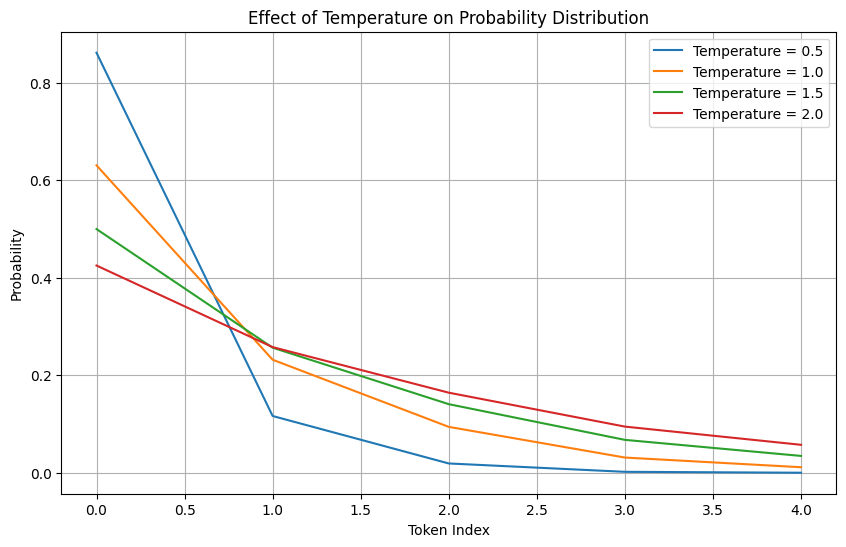

In [13]:
# Simulate logits (e.g., the output from a model for some token)
logits = torch.tensor([2.0, 1.0, 0.1, -1.0, -2.0])

# Define temperature values to test
temperatures = [0.5, 1.0, 1.5, 2.0]

# Prepare a plot for visualization
plt.figure(figsize=(10, 6))

# Apply temperature scaling and plot the effect on the distribution
for temp in temperatures:
    probs = apply_temperature(logits, temp).numpy()  # Apply temperature scaling and get probabilities
    plt.plot(probs, label=f"Temperature = {temp}")

# Set up plot labels and legend
plt.title("Effect of Temperature on Probability Distribution")
plt.xlabel("Token Index")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


Next lets plug the apply_temperature function to the existing greedy function and observe the output first hand

In [14]:
def greedy_generate_with_temperature(prompt, target_length=6, temperature=1.0):
    """Generates exactly `target_length` tokens using greedy search with temperature scaling."""
    
    # Encode input prompt using TikToken
    input_ids = torch.tensor(enc.encode(prompt), dtype=torch.long).unsqueeze(0)

    for _ in range(target_length):  # Generate a fixed number of tokens
        outputs = model(input_ids)
        logits = outputs.logits[:, -1, :]  # Get logits for the last token
        probs = apply_temperature(logits, temperature)  # Apply temperature scaling

        # Sample token based on probability distribution instead of greedy argmax
        next_token_id = torch.multinomial(probs, 1)  # Sampling based on probabilities

        # Ensure next_token_id has the correct shape for concatenation
        next_token_id = next_token_id.squeeze(0)  # Remove the batch dimension

        # Append next token and continue
        input_ids = torch.cat([input_ids, next_token_id.unsqueeze(0)], dim=-1)

    # Decode using TikToken
    generated_text = enc.decode(input_ids.squeeze().tolist())
    return generated_text

# Test the generation with different temperatures
prompt = "I have a dream"
output_text_1 = greedy_generate_with_temperature(prompt, target_length=5, temperature=0.5)
output_text_2 = greedy_generate_with_temperature(prompt, target_length=5, temperature=1.0)
output_text_3 = greedy_generate_with_temperature(prompt, target_length=5, temperature=1.5)

print("Generated Text with Temperature 0.5:", output_text_1)
print("Generated Text with Temperature 1.0:", output_text_2)
print("Generated Text with Temperature 1.5:", output_text_3)


C:\Users\WinDows\AppData\Local\Temp\ipykernel_27688\3731005154.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(F.softmax(scaled_logits, dim=-1))  # Apply softmax to the scaled logits
C:\Users\WinDows\AppData\Local\Temp\ipykernel_27688\3731005154.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(F.softmax(logits, dim=-1))  # Softmax applied directly to logits


Generated Text with Temperature 0.5: I have a dream of becoming a doctor,"
Generated Text with Temperature 1.0: I have a dream of becoming mayor but a
Generated Text with Temperature 1.5: I have a dream makemy me from zero


As you can see, the output is no longer deterministic, as we’ve introduced a parameter that we can tweak to control the level of randomness in the output. This randomness is a key feature because, in real-world conversation, human speech is inherently unpredictable and diverse. By adjusting the temperature, we allow the model to simulate a more natural, human-like behavior in its responses. A higher temperature introduces more variability, similar to how humans might sometimes take unexpected conversational turns, whereas a lower temperature makes the output more focused and deterministic. Ultimately, this adjustment helps make the model's output feel more fluid and dynamic, aligning it closer to the way humans express themselves.

Lets visulize again:

C:\Users\WinDows\AppData\Local\Temp\ipykernel_27688\3731005154.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(F.softmax(scaled_logits, dim=-1))  # Apply softmax to the scaled logits


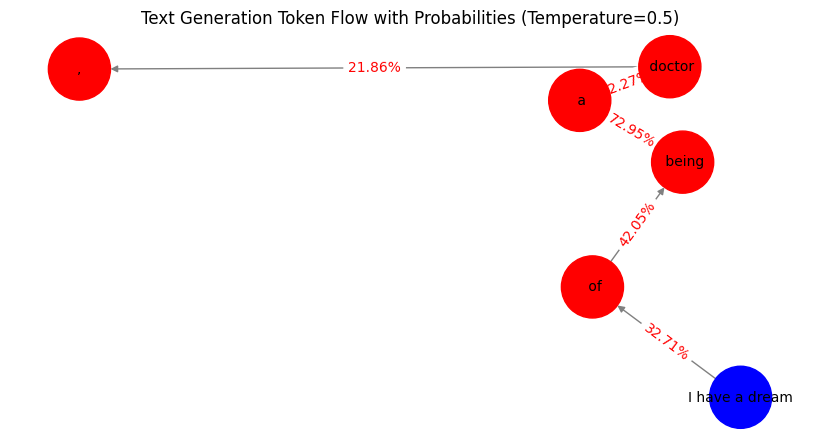

C:\Users\WinDows\AppData\Local\Temp\ipykernel_27688\3731005154.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(F.softmax(logits, dim=-1))  # Softmax applied directly to logits


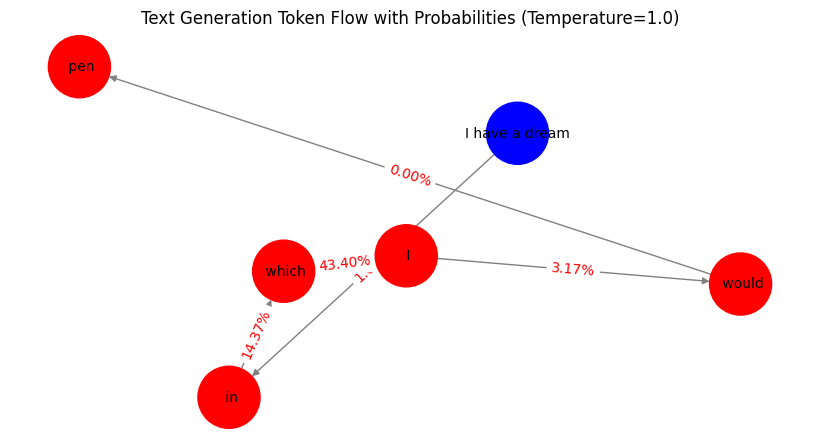

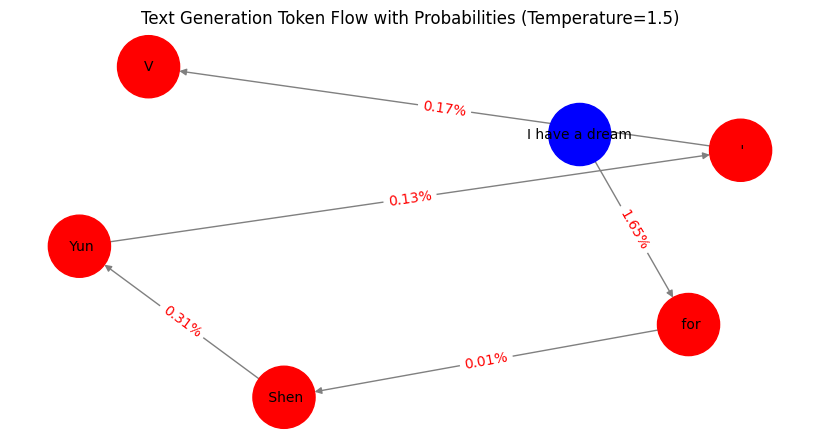

In [15]:
def visualize_token_generation_with_temperature(prompt, target_length=6, temperature=1.0):
    """Generates text while visualizing token sequence and probabilities in a graph with temperature scaling."""
    
    # Encode input prompt
    input_ids = torch.tensor(enc.encode(prompt), dtype=torch.long).unsqueeze(0)

    # Initialize a directed graph
    G = nx.DiGraph()

    # Add first node (input prompt)
    prev_token_text = prompt
    G.add_node(prev_token_text, color='blue')

    for _ in range(target_length):
        outputs = model(input_ids)
        logits = outputs.logits[:, -1, :]
        
        # Apply temperature scaling to logits
        probs = apply_temperature(logits, temperature)

        # Sample token based on the temperature-scaled probabilities
        next_token_id = torch.multinomial(probs, 1)  # Sampling based on probabilities
        prob_value = probs[0][next_token_id].item()  # Keep as a float (not a string)

        # Ensure next_token_id has the correct shape for concatenation
        next_token_id = next_token_id.squeeze(0)  # Remove the batch dimension

        # Append next token and continue
        input_ids = torch.cat([input_ids, next_token_id.unsqueeze(0)], dim=-1)

        # Decode new token
        new_token_text = enc.decode([next_token_id.item()])

        # Add node and edge with numerical probability weight
        G.add_node(new_token_text, color='red')
        G.add_edge(prev_token_text, new_token_text, weight=prob_value)  # Store as float

        # Update previous token
        prev_token_text = new_token_text

    # Draw the graph
    plt.figure(figsize=(8, 4))
    colors = [G.nodes[n]['color'] for n in G.nodes]
    pos = nx.spring_layout(G, seed=42)  # Use seed for consistent layout

    # Draw graph with node colors
    nx.draw(G, pos, with_labels=True, node_color=colors, edge_color="gray", font_size=10, node_size=2000)

    # Convert edge weights to percentage labels
    edge_labels = {(u, v): f"{d['weight'] * 100:.2f}%" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="red")

    plt.title(f"Text Generation Token Flow with Probabilities (Temperature={temperature})")
    plt.show()

# Test the visualization with different temperatures
prompt = "I have a dream"
visualize_token_generation_with_temperature(prompt, target_length=5, temperature=0.5)
visualize_token_generation_with_temperature(prompt, target_length=5, temperature=1.0)
visualize_token_generation_with_temperature(prompt, target_length=5, temperature=1.5)


## Next Parameters to Control Randomness: **Top-k Sampling**

**Top-k Sampling** is a technique that constrains the model’s output to the top-k most probable next tokens. By sampling only from these top-k tokens, we reduce the chance of selecting rare or nonsensical words, while still allowing for variability in the model’s output. This helps balance between coherence and creativity in the generated text.

With top-k sampling, the number of potential next tokens is limited, which can help produce more meaningful outputs by removing lower-probability choices. However, this limitation still maintains some randomness because the next token is selected from a subset of highly probable options, ensuring that the output doesn’t become overly repetitive or predictable.

<div align="center">

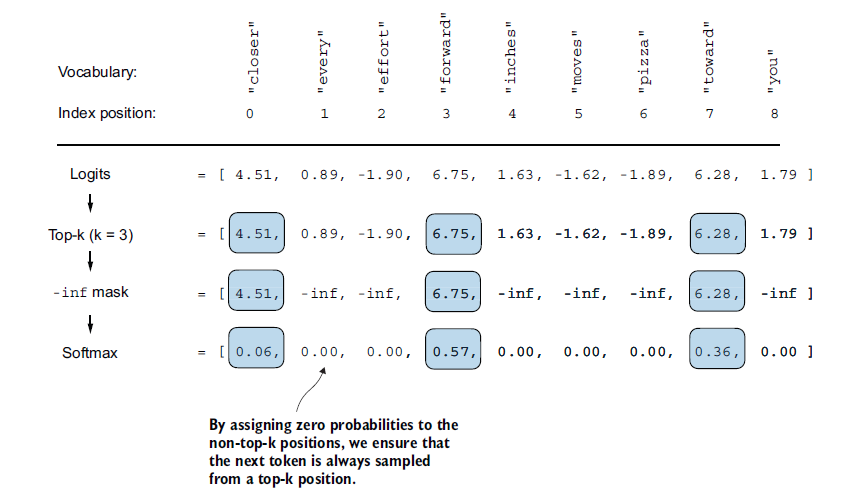

</div>

In [16]:
def top_k_logits(logits, k):
    """
    Filter the logits to keep only the top k values.
    """
    # Get the threshold for the k-th largest logit
    top_k_values, _ = torch.topk(logits, k)
    
    # Get the minimum value among the top k values (this will be the threshold)
    threshold = top_k_values[-1]  # Since top_k_values is 1D, we can directly index it

    # Create a mask for values to remove
    indices_to_remove = logits < threshold

    # Set low probabilities to -inf
    logits[indices_to_remove] = float('-inf')  # Mask logits below threshold

    return logits

# Apply the top-k filtering followed by softmax
def apply_top_k_sampling(logits, k):
    filtered_logits = top_k_logits(logits, k)  # Filter logits to keep top-k
    probs = torch.nn.functional.softmax(filtered_logits, dim=-1)  # Apply softmax to get probabilities
    return probs


In this example, we're simulating the logits output from a model for a sequence of 10 tokens. Logits represent the unscaled predictions made by the model for each token. We'll apply two techniques to manipulate these logits:

Temperature Scaling: Adjusting the logits by a temperature factor to control the randomness of predictions.
Top-k Filtering: Keeping only the top k highest logits and filtering out the rest to reduce the possibilities for the next token.
The temperature parameter will influence the scale of the logits, and the k parameter will determine how many top logits to keep.

In [17]:
# Mock logits data: Simulating model output for 10 tokens
mock_logits = torch.tensor([2.0, 1.0, 0.1, 0.5, 1.5, 3.0, 2.5, 0.2, 0.8, 1.8])

# Example usage
temperature = 0.5  # Adjust this value to see the effect
k = 5  # Number of top logits to keep

# Apply temperature scaling to mock logits
scaled_logits = apply_temperature(mock_logits, temperature)
print("Scaled logits with temperature:")
print(scaled_logits)

# Apply top-k filtering to the original logits
top_k_filtered_logits = top_k_logits(mock_logits.clone(), k)  # Use clone to avoid modifying original logits
print("\nTop-k filtered logits:")
print(top_k_filtered_logits)

# Apply softmax to top-k filtered logits for probabilities
top_k_probs = F.softmax(top_k_filtered_logits, dim=-1)
print("\nProbabilities after top-k filtering:")
print(top_k_probs)


Scaled logits with temperature:
tensor([0.0802, 0.0109, 0.0018, 0.0040, 0.0295, 0.5925, 0.2180, 0.0022, 0.0073,
        0.0537])

Top-k filtered logits:
tensor([2.0000,   -inf,   -inf,   -inf, 1.5000, 3.0000, 2.5000,   -inf,   -inf,
        1.8000])

Probabilities after top-k filtering:
tensor([0.1472, 0.0000, 0.0000, 0.0000, 0.0893, 0.4002, 0.2427, 0.0000, 0.0000,
        0.1205])


C:\Users\WinDows\AppData\Local\Temp\ipykernel_27688\3731005154.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(F.softmax(scaled_logits, dim=-1))  # Apply softmax to the scaled logits


## Finally we have : Nucleus sampling (top p):

Nucleus sampling, also known as top-p sampling, takes a different approach from top-k sampling. Rather than selecting the top 
k most probable tokens, nucleus sampling chooses a cutoff value 
p such that the sum of the probabilities of the selected tokens exceeds 
p. This forms a “nucleus” of tokens from which to randomly choose the next token.In other words, the model examines its top probable tokens in descending order and keeps adding them to the list until the total probability surpasses the threshold p. Unlike top-k sampling, the number of tokens included in the nucleus can vary from step to step. This variability often results in a more diverse and creative output, making nucleus sampling popular for tasks such as text generation.

In [18]:
def top_p_logits(logits, p=0.5):
    """
    Filter the logits using top-p (nucleus sampling) approach.
    Keeps the smallest set of logits whose cumulative probability is greater than or equal to p.
    """
    # Convert logits to probabilities using softmax
    probs = F.softmax(logits, dim=-1)
    
    # Sort the probabilities and get the sorted indices
    sorted_probs, sorted_indices = torch.sort(probs, descending=True)
    
    # Calculate the cumulative probability distribution
    cumulative_probs = torch.cumsum(sorted_probs, dim=-1)
    
    # Remove tokens with cumulative probability greater than p
    sorted_probs[cumulative_probs > p] = 0
    
    # Re-sort the probabilities back to original order
    filtered_logits = torch.zeros_like(logits)
    filtered_logits.scatter_(dim=-1, index=sorted_indices, src=sorted_probs)
    
    return filtered_logits

# Example usage
logits = torch.tensor([2.0, 1.5, 0.5, 1.0, 2.5, 0.2, 0.3])  # Simulating model output for 7 tokens
p = 0.9  # Top-p value

# Apply top-p filtering
filtered_logits = top_p_logits(logits, p)
print("Filtered logits after top-p sampling:")
print(filtered_logits)


Filtered logits after top-p sampling:
tensor([0.2384, 0.1446, 0.0000, 0.0877, 0.3931, 0.0000, 0.0000])


Now lets re-implement the generation function but now with the addition of temperature and top-k sampling.

In [19]:


def generate(model, prompt, max_new_tokens, context_size, tokenizer, temperature=0.0, top_k=None, top_p=None, eos=None):
    # Step 1: Encode the input prompt into token indices
    idx = tokenizer.encode(prompt)  # Convert the prompt into a list of token indices
    idx = torch.tensor(idx, dtype=torch.long).unsqueeze(0)  # Convert to a tensor and add batch dimension

    # Initialize idx_gen to store generated token indices
    idx_gen = idx.clone()  # Start with the prompt indices

    # Step 2: Generate new tokens one at a time
    for _ in range(max_new_tokens):
        idx_cond = idx_gen[:, -context_size:]  # Get the most recent context of tokens (up to context_size)
        
        with torch.no_grad():  # Disable gradient calculation for inference
            logits = model(idx_cond)  # Forward pass through the model to get logits
            logits = logits[:, -1, :]  # Take the logits of the last token generated

            # Apply top-k filtering (if specified)
            if top_k is not None:
                top_k_values, _ = torch.topk(logits, k=top_k)  
                min_value = top_k_values[:, -1].unsqueeze(1)  # Get the minimum value of the top k logits
                logits = torch.where(logits < min_value, torch.tensor(float('-inf')).to(logits.device), logits)
            
            # Apply top-p (nucleus sampling) (if specified)
            if top_p is not None:
                logits = top_p_logits(logits, p=top_p)  # Apply top-p filtering

            # Apply temperature scaling to logits
            if temperature > 0.0:
                logits = logits / temperature
                probs = F.softmax(logits, dim=-1)  # Convert logits to probabilities
                idx_next = torch.multinomial(probs, num_samples=1)  # Sample from the distribution
            else: 
                idx_next = torch.argmax(logits, dim=-1, keepdim=True)  # Take the index of the max logit
            
            # Step 5: Check for end of sequence (EOS)
            if eos is not None and torch.equal(idx_next, torch.tensor(eos).to(logits.device)):
                break
            
            # Step 6: Append the new token to the generated sequence
            idx_gen = torch.cat((idx_gen, idx_next), dim=1)
    
    # Decode the generated token indices back to text
    result = tokenizer.decode(idx_gen.squeeze(0).tolist())  # Convert the indices back to text 
    return result  # Return the generated text


Play with the function and its parameters to see what you will get

In [193]:
tokenizer = tiktoken.get_encoding('gpt2')  # Initialize tokenizer
prompt = "I have a dream that "
max_new_tokens = 5 # Keep the output short for coherence
context_size = 512  # Suitable for transformer models

generated_text = generate(
    model=gpt,  # The GPT model to use for text generation
    prompt=prompt,
    max_new_tokens=max_new_tokens,
    context_size=context_size,
    tokenizer=tokenizer,
    temperature=0.75,  # Lower temperature for more coherence
    top_k=None,  # Reduced top_k for less randomness
    top_p=None,  # Reduced top_p for more coherent sampling
)
print(generated_text)


I have a dream that  I will have you


## The secod algorithm : Beam Search
Unlike greedy search, which only considers the next most probable token, beam search takes into account the n most likely tokens, where 
n represents the number of beams. This procedure is repeated until a predefined maximum length is reached or an end-of-sequence token appears. At this point, the sequence (or “beam”) with the highest overall score is chosen as the output.
We can adapt the previous function to consider the n most probable tokens instead of just one. Here, we’ll maintain the sequence score 
log P(w), which is the cumulative sum of the log probability of every token in the beam. We normalize this score by the sequence length to prevent bias towards longer sequences (this factor can be adjusted). Once again, we’ll generate five additional tokens to complete the sentence “I have a dream.”

# **🚀 Beam Search: A Deep Dive into the Mechanics 🚀**  

Beam search is a **decoding algorithm** used in sequence generation tasks (like text generation in GPT models) to find the most probable output sequence. Unlike **greedy decoding**, which selects only the most probable token at each step, beam search **keeps multiple hypotheses (beams) alive** at each step, improving the quality of the generated text.  


## **1️⃣ Why Not Use Greedy Search? 🤔**  
A simple **greedy search** picks the most probable next word at each step. However, this often leads to suboptimal outputs because it ignores **alternative promising sequences**.  

### **Example: Greedy vs. Beam Search**  
🔹 Given the phrase **"I have a dream"**, assume our model predicts the next words as follows:  
| Rank | Word | Probability |
|------|------|------------|
| 1️⃣  | today  | **0.30**  |
| 2️⃣  | that  | **0.28**  |
| 3️⃣  | where | **0.15**  |
| 4️⃣  | in    | **0.12**  |

- **Greedy Search** → Always picks the top word ("today"), leading to a **single path**.  
- **Beam Search (beam=2)** → Tracks **two** paths at each step, keeping both "today" and "that" alive.  

This means that if "today" leads to a bad sentence later, "that" may still form a **better overall output**.


## **2️⃣ How Beam Search Works: Step by Step 🔍**  

### **Step 1: Initialize the Search**  
- Encode the input prompt **into token IDs** (e.g., `"I have a dream"` → `[314, 234, 123]`).  
- Start with one **initial hypothesis** (the input sequence itself).  

### **Step 2: Expand the Hypotheses**  
- Get the **logits** (probabilities) for the next word from the model.  
- Select the **top-k words** (controlled by beam width).  
- Append each of these words to the **existing sequences**.  

### **Step 3: Keep the Best Beams**  
- Compute the **cumulative log probability** for each sequence.  
- Keep the **top `beam_width` sequences** with the highest probabilities.  
- Repeat until the **maximum number of tokens is generated**.  

### **Step 4: Select the Best Sequence**  
- Once the process is complete, select the **highest-probability sequence** as the final output.  

---

## **3️⃣ Visualizing Beam Search**
Let’s assume `beam_width = 2` and we start with:  

🔹 **Input** → `"I have a dream"`  
🔹 **Top predictions at step 1:**  
```
today (0.30)  |  that (0.28)
```
🔹 **Next step predictions:**  
```
today is (0.25) | today I (0.20)  | that we (0.22)  | that this (0.18)
```
🔹 **Keep top 2 beams**:  
```
today is (0.25) | that we (0.22)
```
🔹 **Final step predictions:**  
```
today is great (0.18) | today is now (0.16) | that we must (0.20) | that we are (0.19)
```
🔹 **Final output:**  
**"That we must"** (since it has the highest probability).  

In [20]:
import torch
import torch.nn.functional as F

def generate(model, prompt, max_new_tokens, context_size, tokenizer, temperature=1.0, top_k=None, top_p=None, eos=None):
    # Step 1: Encode the input prompt into token indices
    idx = tokenizer.encode(prompt)  # Convert the prompt into a list of token indices
    idx = torch.tensor(idx, dtype=torch.long).unsqueeze(0)  # Convert to a tensor and add batch dimension

    # Initialize idx_gen to store generated token indices
    idx_gen = idx.clone()  # Start with the prompt indices

    # Step 2: Generate new tokens one at a time
    for _ in range(max_new_tokens):
        idx_cond = idx_gen[:, -context_size:]  # Get the most recent context of tokens (up to context_size)
        
        with torch.no_grad():  # Disable gradient calculation for inference
            logits = model(idx_cond)  # Forward pass through the model to get logits
            logits = logits[:, -1, :]  # Take the logits of the last token generated

            # Apply top-k filtering (if specified)
            if top_k is not None:
                top_k_values, _ = torch.topk(logits, k=top_k)  
                min_value = top_k_values[:, -1].unsqueeze(1)  # Get the minimum value of the top k logits
                logits = torch.where(logits < min_value, torch.tensor(float('-inf')).to(logits.device), logits)
            
            # Apply top-p (nucleus sampling) (if specified)
            if top_p is not None:
                logits = top_p_logits(logits, p=top_p)  # Apply top-p filtering

            # Apply temperature scaling to logits
            if temperature > 0.0:
                logits = logits / temperature  # Scale logits by temperature
                probs = F.softmax(logits, dim=-1)  # Convert logits to probabilities
                idx_next = torch.multinomial(probs, num_samples=1)  # Sample from the distribution
            else: 
                idx_next = torch.argmax(logits, dim=-1, keepdim=True)  # Take the index of the max logit
            
            # Step 5: Check for end of sequence (EOS)
            if eos is not None and torch.equal(idx_next, torch.tensor(eos).to(logits.device)):
                break
            
            # Step 6: Append the new token to the generated sequence
            idx_gen = torch.cat((idx_gen, idx_next), dim=1)
    
    # Decode the generated token indices back to text
    result = tokenizer.decode(idx_gen.squeeze(0).tolist())  # Convert the indices back to text 
    return result  # Return the generated text

import torch
import torch.nn.functional as F

def generate(model, prompt, max_new_tokens, context_size, tokenizer, temperature=1.0, top_k=None, top_p=None, eos=None):
    # Step 1: Encode the input prompt into token indices
    idx = tokenizer.encode(prompt)  # Convert the prompt into a list of token indices
    idx = torch.tensor(idx, dtype=torch.long).unsqueeze(0)  # Convert to a tensor and add batch dimension

    # Initialize idx_gen to store generated token indices
    idx_gen = idx.clone()  # Start with the prompt indices

    # Step 2: Generate new tokens one at a time
    for _ in range(max_new_tokens):
        idx_cond = idx_gen[:, -context_size:]  # Get the most recent context of tokens (up to context_size)
        
        with torch.no_grad():  # Disable gradient calculation for inference
            logits = model(idx_cond)  # Forward pass through the model to get logits
            logits = logits[:, -1, :]  # Take the logits of the last token generated

            # Apply top-k filtering (if specified)
            if top_k is not None:
                top_k_values, _ = torch.topk(logits, k=top_k)  
                min_value = top_k_values[:, -1].unsqueeze(1)  # Get the minimum value of the top k logits
                logits = torch.where(logits < min_value, torch.tensor(float('-inf')).to(logits.device), logits)
            
            # Apply top-p (nucleus sampling) (if specified)
            if top_p is not None:
                logits = top_p_logits(logits, p=top_p)  # Apply top-p filtering

            # Apply temperature scaling to logits
            if temperature > 0.0:
                logits = logits / temperature  # Scale logits by temperature
                probs = F.softmax(logits, dim=-1)  # Convert logits to probabilities
                idx_next = torch.multinomial(probs, num_samples=1)  # Sample from the distribution
            else: 
                idx_next = torch.argmax(logits, dim=-1, keepdim=True)  # Take the index of the max logit
            
            # Step 5: Check for end of sequence (EOS)
            if eos is not None and torch.equal(idx_next, torch.tensor(eos).to(logits.device)):
                break
            
            # Step 6: Append the new token to the generated sequence
            idx_gen = torch.cat((idx_gen, idx_next), dim=1)
    
    # Decode the generated token indices back to text
    result = tokenizer.decode(idx_gen.squeeze(0).tolist())  # Convert the indices back to text 
    return result  # Return the generated text


In [197]:
# Load GPT-2 model & tokenizer (Hugging Face)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = GPT2LMHeadModel.from_pretrained("gpt2").to(device)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Define parameters
prompt = "I have a dream"
max_new_tokens = 10
beam_width = 3  # Number of beams

# Run beam search
generated_text = generate(
    model=model,
    tokenizer=tokenizer,
    prompt=prompt,
    max_new_tokens=max_new_tokens,
    beam_width=beam_width,
)

print(f"Generated text: {generated_text}")

Generated text: I have a dream that I will be able to do something like this


![Beam Search Visualization](images/beam.png)


At this point we have all the tools and knowlege to build a robust custom genration function  

Lets build step by step using all we just learned 

## First : Making some helper function 

In [29]:
## calculate the log probability of a token in a sequence generated by the model
def get_log_prob(logits, token_id):
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    log_prob = torch.log(probabilities[token_id])
    return log_prob.item()

## Second : coding the decoding strategies as sepret functions:

In [ ]:
## greedy sampling : just select the top-k tokens with the highest probabilities
def greedy_sampling(logits, beams):
    return torch.topk(logits, beams).indices

# top-k sampling : select from the top-k tokens with the highest probabilities
def top_k_sampling(logits, temperature, top_k, beams):
    indices_to_remove = logits < torch.topk(logits, top_k)[0][..., -1, None]
    logits[indices_to_remove] = float('-inf')
    probabilities = torch.nn.functional.softmax(logits / temperature, dim=-1)
    return torch.multinomial(probabilities, beams)

# top-p sampling : select from the smallest set of tokens whose cumulative probability is greater than or equal to p
def nucleus_sampling(logits, temperature, p, beams):
    sorted_logits, sorted_indices = torch.sort(logits, descending=True)
    probabilities = torch.nn.functional.softmax(sorted_logits / temperature, dim=-1)
    cumulative_probabilities = torch.cumsum(probabilities, dim=-1)
    mask = cumulative_probabilities < p
    top_p_index_to_keep = torch.where(mask)[0][-1].detach().cpu().tolist() if mask.sum() > beams else beams
    indices_to_remove = sorted_indices[top_p_index_to_keep:]
    sorted_logits[indices_to_remove] = float('-inf')
    probabilities = torch.nn.functional.softmax(sorted_logits / temperature, dim=-1)
    return torch.multinomial(probabilities, beams)

Now we make all come together in the following function:

In [32]:
from tqdm.notebook import tqdm
import tiktoken

# Initialize tokenizer
encoding = tiktoken.get_encoding("gpt2")

def generate(prompt, length, beams, sampling, temperature=0.1):
    """
    Perform beam search for text generation.
    
    Args:
        prompt (str): Input text prompt to start generation.
        length (int): Number of tokens to generate.
        beams (int): Number of beams to keep during search.
        sampling (str): Sampling method ('greedy', 'top_k', 'nucleus').
        temperature (float, optional): Softmax temperature for sampling. Default is 0.1.
    
    Returns:
        str: Generated text sequence.
    """
    # Tokenize input prompt using tiktoken
    input_ids = torch.tensor(encoding.encode(prompt)).unsqueeze(0)
    
    # Initialize sequence list with the input tokens and score (log probability)
    sequences = [(input_ids, 0)]  # (sequence, score)
    
    for _ in range(length):
        new_sequences = []
        
        # Iterate through current sequences
        for seq, score in sequences:
            # Get model outputs and extract logits for the last token
            outputs = model(seq)
            logits = outputs.logits[0, -1, :]
            
            # Select the next token(s) based on the chosen sampling method
            if sampling == 'greedy':
                top_token_ids = greedy_sampling(logits, beams)
            elif sampling == 'top_k':
                top_token_ids = top_k_sampling(logits, temperature, 20, beams)
            elif sampling == 'nucleus':
                top_token_ids = nucleus_sampling(logits, temperature, 0.5, beams)
            
            # Iterate through the selected token candidates
            for token_id in top_token_ids:
                # Compute log probability of the selected token
                token_score = get_log_prob(logits, token_id)
                cumulative_score = score + token_score  # Update sequence score
                
                # Append the new token to the sequence
                new_input_ids = torch.cat([seq, token_id.unsqueeze(0).unsqueeze(0)], dim=-1)
                new_sequences.append((new_input_ids, cumulative_score))
        
        # Keep only the top `beams` sequences based on score
        sequences = sorted(new_sequences, key=lambda x: x[1], reverse=True)[:beams]
    
    # Decode the best sequence into text
    best_sequence = sequences[0][0].squeeze().tolist()
    return encoding.decode(best_sequence)


Let test it out : 


In [34]:
# Parameters
length = 5
beams = 2
sampling_method = 'nucleus'  # Choose from 'greedy', 'top_k', 'nucleus'
prompt_text = "I have a dream"

# Start text generation
best_sequence = generate(prompt_text, length, beams, sampling_method, 1)
print(f"Generated sequence: {best_sequence}")

Generated sequence: I have a dream. I want to be


## **Building a UI with Gradio** 🌐

### **The Importance of Presenting Machine Learning Models via UI**

In today’s rapidly advancing technological landscape, machine learning (ML) models are becoming integral to various industries, ranging from healthcare to entertainment. However, the complexity of these models often creates a barrier for consumers and non-technical users. This is where **user interfaces (UIs)** come into play, enabling a seamless interaction between users and advanced ML models.

<p align="center">
    <img src="images/gradio.png" alt="Gradio Overview" />
</p>

---

### **Utilizing Gradio for User-Friendly Interfaces**

To effectively present our ML models to consumers and non-technical users, we turn to **Gradio**. This open-source library empowers us to create simple yet interactive web-based UIs for our models with minimal coding. With Gradio, we can:

- **Quickly develop and deploy intuitive interfaces** that allow users to interact with our models seamlessly, regardless of technical background.
- **Provide a platform for user input and model outputs**, making it easy for users to understand and appreciate the functionalities of our models.
- **Foster engagement and gather feedback** efficiently, allowing us to continuously improve and refine our models based on real-world interaction.

In conclusion, presenting machine learning models through intuitive UIs is essential for **enhancing accessibility**, **promoting user engagement**, and **building trust** among non-technical users. By leveraging tools like **Gradio**, we ensure our models are not only powerful but also accessible, helping meet the needs of a diverse audience.

<p align="center">
    <img src="images/app.png" alt="Gradio Application" />
</p>

In [45]:
import gradio as gr

#  Gradio interface components
def generate_text_gradio(prompt, length, beams, sampling, temperature):
    return generate(prompt, length, beams, sampling, temperature)

prompt_input = gr.Textbox(
    label="Enter your Prompt", 
    placeholder="Type your prompt here...", 
    lines=3,  
    max_length=500,  
    info="Provide a short text prompt to guide the text generation."
)

length_input = gr.Slider(
    minimum=10, 
    maximum=500,  
    step=1, 
    label="Length of Generated Text", 
    value=100,  
    info="Control how long the generated text should be (in terms of tokens/words)."
)

beams_input = gr.Slider(
    minimum=1, 
    maximum=10,  
    step=1, 
    label="Number of Beams (Beam Search)", 
    value=3, 
    info="Set the number of beams for beam search, affecting the quality of the output."
)

sampling_input = gr.Radio(
    ["greedy", "top_k", "nucleus"],  
    label="Sampling Method", 
    value="greedy",  
    info="Choose the sampling method. 'Greedy' selects the most probable token, 'Top-k' limits the possible next tokens, 'Nucleus' samples from the top 'p' probability."
)

temperature_input = gr.Slider(
    minimum=0.0, 
    maximum=1.0, 
    step=0.1, 
    label="Temperature (Randomness Control)", 
    value=0.7,  
    info="Adjust the temperature: higher values make the output more random, lower values make it more deterministic."
)

output_text = gr.Textbox(
    label="Generated Text", 
    placeholder="Generated content will appear here...", 
    lines=10,  
    interactive=False,  
    info="This is where the generated text will be displayed based on your inputs."
)

# Create the Gradio interface with detailed components and dynamic outputs
gr.Interface(
    fn=generate_text_gradio,  
    inputs=[prompt_input, length_input, beams_input, sampling_input, temperature_input],  
    outputs=output_text,  
    live=True,  
    title="Meta_Bot Demo",  
    description="This tool allows you to generate creative and customizable text based on your prompt. " 
                "Adjust parameters like text length, sampling strategy, and randomness (temperature) to control the output. "
                "Perfect for exploring different types of text generation based on various configurations.",
    theme="compact"  
).launch()

c:\Users\WinDows\anaconda3\envs\LLM\lib\site-packages\gradio\blocks.py:1057: UserWarning: Cannot load compact. Caught Exception: The space compact does not exist
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


* Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.


# Summary of Notebook Activities

In this notebook, we focused on building a text generation application using a custom implementation of GPT-2. Here’s a breakdown of the steps we followed:

1. **Loading Pre-trained Weights**: We utilized the Hugging Face library to load the pre-trained weights of the GPT-2 model, ensuring that all configurations matched our model  setup (which we build from scratch in the previous notebook)for seamless integration.

2. **Custom Generation Function**: Instead of relying on the Hugging Face pipeline for text generation, we implemented a custom generation function from scratch. This approach enhanced our understanding of the underlying mechanisms of text generation.

3. **Enhanced Text Generation**: We improved the text generation process by adding temperature scaling and top-k sampling techniques. These enhancements resulted in noticeable improvements in the quality and diversity of the generated text.

4. **Gradio UI Integration**: We built a user-friendly interface using Gradio, allowing users to easily input prompts and adjust generation parameters. This seamless integration facilitated real-time interaction with our text generation model.

This notebook serves as a practical demonstration of loading pre-trained models, implementing custom text generation logic, and creating an interactive user interface.


In [47]:
import gradio as gr
import random

# Fun function to generate clever deep learning jokes and motivational messages
def deep_humor():
    jokes = [
        "🤖 Why did the neuron break up with the dataset? It couldn’t find enough connection! 🧠",
        "📉 My loss function and I are like soulmates—we keep getting closer but never quite hit zero. 💔",
        "🏋️‍♂️ I’m not saying my model’s heavy, but even my GPU’s asking for a cheat day! 🏋️‍♀️",
        "🚀 Why did the deep learning model go to space? To reduce its overfitting by adding more space data! 🌌",
        "💥 My code doesn’t always work, but when it does, it does so on the last line before the crash! 💻",
        "🌐 Neural nets are like relationships—they take forever to train and sometimes, they still don’t generalize. 😂",
        "🔥 Remember, friends don't let friends use ReLU without any leaky alternatives! ⚡"
    ]
    next_adventure = "⚔️ Next up: We’re taking the model to the optinization land for even better infrence and deployment 💥"
    return random.choice(jokes), next_adventure

# Create a Gradio interface to celebrate with DL-themed jokes
def celebration_interface():
    gr.Interface(
        fn=deep_humor, 
        inputs=[], 
        outputs=[
            gr.Textbox(label="Clever AI Joke", lines=2),
            gr.Textbox(label="What’s Next?", lines=2)
        ],
        title="🎉 Deep Humor",
        description="Congratulations on taming GPT-2! Now enjoy some deep learning humor, and get ready for the next epic challenge!",
        theme="default",
        live=True
    ).launch(share=False)

# Launch the celebration interface
celebration_interface()


* Running on local URL:  http://127.0.0.1:7872

To create a public link, set `share=True` in `launch()`.


# 🎉 Congratulations, You Rockstar! 

You've just unleashed your very own text generation model using GPT-2, complete with awesome enhancements like temperature scaling and top-k sampling. You even built a snazzy Gradio interface for seamless interaction—talk about leveling up your AI game! 🚀